### OpenCV(Open Source Computer Vision) 개요

    - Computer Vision : 사람의 시각적인 부분을 기계로 구현하는 것을 목적으로 하는 딥러닝 분야
    - OpenCV : 이미지, 동영상 등의 처리를 지원하는 라이브러리
    - C++ 로 제작되어 있고 Java, JS, Android, Python 등 다양한 언어에서 활용 가능
    - 특히 Python에서 사용할 경우 Numpy, Matplotlib 등의 라이브러리와 바로 연동 가능
    
- https://opencv.org/ : OpenCV 공식 사이트
- https://github.com/opencv/opencv : OpenCV github 사이트

In [ ]:
# opencv 설치

# !pip install opencv-python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# opencv import
import cv2

In [ ]:
# imread : 이미지 불러오기

cat = cv2.imread("image/cat.jpg")

# opencv와 matplotlib 연동 가능
plt.imshow(cat);

In [ ]:
cat

### OpenCV의 색상 체계

일반적인 이미지를 matplotlib으로 출력서 RGB 색상 체계를 사용\
OpenCV는 RGB 색상 체계를 사용\
따라서 RGB 이미지를 cv2로 불러와서 matplotlib으로 출력하면 Red 계열 색상이 Blue 계열 색상으로 변경되어 출력\
초창기에는 알파벳 순서대로 BGR로 표현, 이후 색상에 주파수 낮은 순서대로 바뀌어 대중적인 RGB로 사용 된 것\
OpenCV에서 RGB 이미지를 그대로 표현하려면 변화의 단계를 거쳐 출력해야 함

In [ ]:
cat = cv2.imread("image/cat.jpg")
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
plt.imshow(cat);

In [ ]:
cat

In [ ]:
print(cat.shape) # 세로 픽셀 수, 가로 픽셀 수, 채널수 (컬러는 3)
print(cat.size) # 전체 데이터 값 개수
print(cat.dtype) # 데이터 타입

# uint8 : unsigned interger (부호가 없는 정수)

### 이미지 색상 종류

- 컬러 이미지(RGB)
- 흑백 이미지 (Gray) 0~255 사이의 흑백 픽셀값으로 구성된 이미지
    - 컬러 이미지는 용량이 크고 연산량이 많기 때문에 이를 간소화 시켜 처리 함을 위해 흑백 이미지를 사용
- 이진 이미지 (binary) 0과 255 두 가지 값으로만 구성된 이미지
    - 배경과 객체를 잘 구분
    - 관심 영역과 비관심 영역을 구분
    - 필터를 만들거나 단순 이미지를 처리하는 경우에 사용

##### 1. 기존 컬러 이미지를 Gray로 불러 받아 출력

In [ ]:
cat_gray = cv2.imread("image/cat.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(cat_gray, cmap="gray");

##### 2. 컬러 이미지를 그대로 불러서 cvtColor를 통해 Gray로 변환 후 출력

In [ ]:
cat2 = cv2.imread("image/cat.jpg")
# 불러온 컬러 이미지를 gray로
cat2_gray = cv2.cvtColor(cat2, cv2.COLOR_BGR2GRAY)

plt.imshow(cat2_gray, cmap="gray");

### 이진 이미지 만들기

- 기존 이미지가 컬러 이미지라면 gray 이미지로 변환 후 이진으로 바꿔줘야 함

In [ ]:
# threshold(문턱값, 경계값) : 특정 기준값을 통해서 데이터를 변환시켜주는 함수
# (이미지, 경계기준값, 경계값보다 클 때 적용되는 값, 경계값 적용방식)

# _ : 첫번재 리턴값은 받지 않음 (threshold 함수는 두 가지 값이 리턴됨)
# 리턴 값의 첫번째는 경계값 수치, 두번째는 경계값 기준이 적용된 이미지를 뜻함
_, bi_cat = cv2.threshold(cat2_gray, 128, 255, cv2.THRESH_BINARY)

plt.imshow(bi_cat, cmap="gray");

In [ ]:
temp, bi_cat = cv2.threshold(cat2_gray, 145, 255, cv2.THRESH_BINARY)
temp

In [ ]:
bi_cat

### cv2.threshold(img, threshold_value, value, flag)

- img : gray 이미지
- threshold_value : 경계 기준값
- value : 경계값 보다 클 때 적용되는 값
- flag : 경계값 적용 방식

    - cv2.THRESH_BINARY : 픽셀값이 경계값보다 크면 value, 아니면 0을 할당 (흰색 or 검은색으로 표시
    - cv2.THRESH_BINARY_INV : 픽셀값이 경계값보다 크면 0, 아니면 value 할당
    - cv2.THRESH_TRUNC : 픽셀값이 경계값보다 크면 경계값, 아니면 픽셀값 할당 (가장 흰 부분이 경계값으로 표시)
    - cv2.THRESH_TOZERO : 픽셀값이 경계값보다 크면 픽셀값, 아니면 0을 할당 (검은색 부각)
    - cv2.THRESH_TOZERO_INV : 픽셀값이 경계값보다 크면 0, 아니면 픽셀값 할당

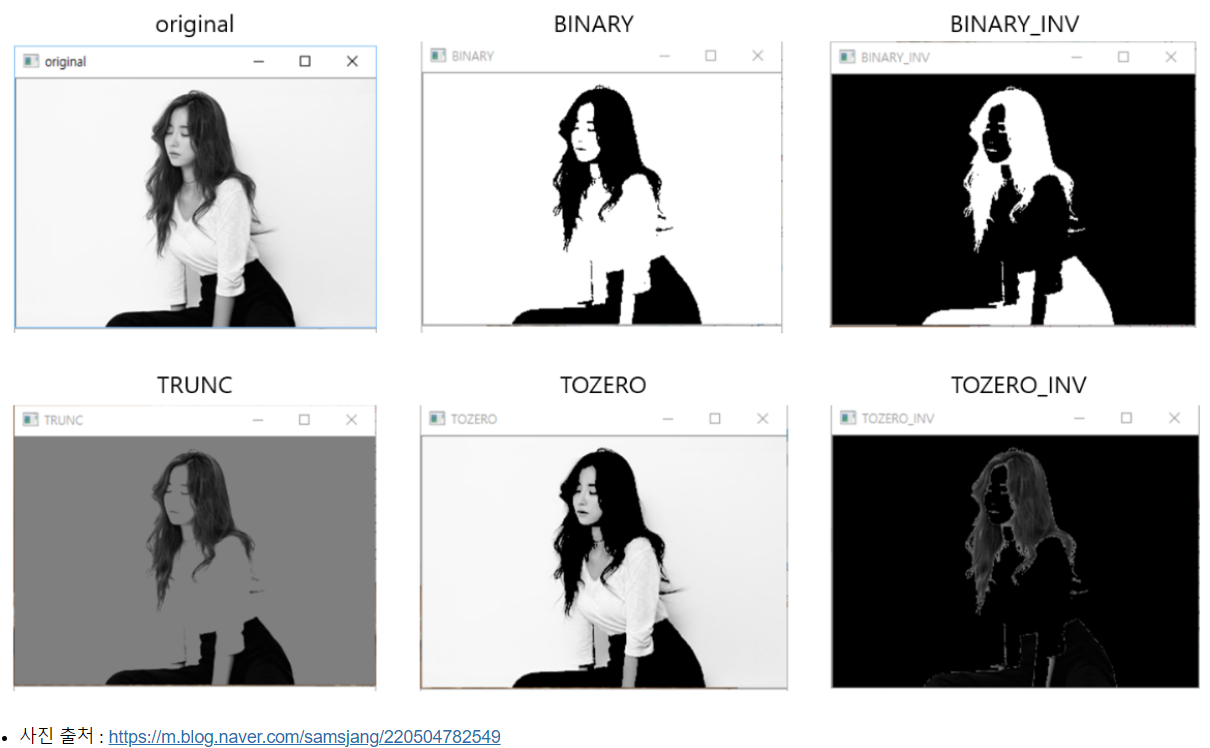

### 동영상 혹은 카메라 (웹 캠) 불러오기

In [ ]:
# 영상에 있는 프레임 출력해보기

''' 영상을 다룰 때는 연속된 프레임을 실시간으로 처리해주기 때문에 제대로\
    동작하지 않았을 경우에 대한 예외처리를 해주는 것이 오류로 인한 중단을\
    방지하거나 오류의 위치를 파악함에 있어 유리함 '''

# 코드 실행에 문제가 없을 경우
try : 
    # 1. 카메라(웹캠) 으로부터 캡처(일반적으로 내장 카메라는 0번으로 인식)
    # cap = cv2.VideoCapture(0)
    
    # 2. 동영상으로부터 캡처
    cap = cv2.VideoCapture("image/video.mp4")
    print("비디오 캡처 <성공>")

# 코드 실행에 문제가 있을 경우
except : 
    print("비디오 캡처 실패")
    
# 2. 캡처해 온 프레임을 읽고 출력 시키기
# read : 캡처한 이미지 프레임을 한 장씩 읽어옴
# ret : 읽기 성공여부 (True, False)
# frame : 실제 이미지의 배열 데이터
ret, frame = cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

print("읽기 성공 여부:", ret)
print("프레임 shape", frame.shape)
print(frame)

plt.imshow(frame);

### 동영상 읽어와서 동영상으로 출력하기    

In [ ]:
try : 
    # 영상에서 프레임단위로 사진을 캡쳐해서 받아오기
    cap = cv2.VideoCapture(0)
    # cap = cv2.VideoCapture("image/video.mp4")
    print("비디오 캡처 <시작>")
    
except : 
    print("비디오 캡처 ㅠ실패ㅠ")
    
# 캡처해온 프레임을 계속 한장씩 읽어와 연결화 시키기 (영상화)
while True :
    ret, frame = cap.read()
    '''
       폭력 감지 영상 판단을 예시로 들면 CCTV 영상에서 frame 단위로 이미지를
       읽어온 후, 폭력 이미지인지 아닌지를 판단하는 딥러닝 모델에 넣어서
       model.predict(frame)로 영상의 각 프레임들이 폭력인지 아닌지를 판단
       해 내도록 할 수 있음.
       단, 모델이 무겁다면 예측하는데 시간이 많이 소요되기 때문에 실시간
       판단이 힘들어지거나 출력되는 영상의 초당 프레임수(FPS)가 떨어지는
       현상이 발생할 수 있음
    '''
    
    # 영상 좌우반전 (1:좌우반전, 0:상하반전)
    frame = cv2.flip(frame, 1)
    # 비디오 창 크기 설정
    frame = cv2.resize(frame, (600,450))
    # 흑백 영상 설정
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 영상으로 부터 프레임을 받아오지 못했거나 다 읽었을 경우 메모리 할당 끊기
    if ret == False :
        print("프레임 읽기 실패 or 프레임 모두 읽음")
        cap.release()
        cv2.destroyAllWindows()
        break
        
    # imshow : 새 윈도우 창을 띄워 이미지 or 영상 출력 (창 이름, 프레임)
    cv2.imshow("video^^7", frame)
    
    # waitKey : 키보드의 특정 값을 입력받을 때까지 기다리며 지정된 시간만큼 대기하는 함수
    # 한장의 프레임을 일고 40ms 후 다음 프레임 읽어옴 (우리 영상은 초당 25프레임)
    key = cv2.waitKey(40)
    
    '''
       - 일반적으로 동영상을 초당 30장 이상의 프레임으로 출력하면 부드러운 영상
       - waitKey 괄호 안의 시간 단위는 ms이므로 실제 1초는 숫자 1000이 됨
       - 영상의 실제 프레임 수와 waitKey값이 차이가 나면 플레이 자체는 문제가 없지만
         뒤쪽 프레임 일부가 잘려서 실행 될 수도 있음
       - 영상의 초당 프레임수가 다르면 거기에 맞춰 딜레이 시간을 설정해야 함
         ex) 영상이 초당 60프레임 이라면 16 or 17ms로 설정
    '''
    
    # 재생 도중 영상을 끄고 싶을 경우 (윈도우 창 X를 누르면 커널을 재시작 해야 함)
    # 아스키코드 : 미국표준협회에서 제시한 표준 코드 체계 (키보드의 키값들을 코드에서 숫자로 표현)
    # 27 : esc | 49 : 키보드 숫자 1
    if key == 27 :
        print("동영상 읽기 종료")
        cap.release()
        cv2.destroyAllWindows()
        break

### 동영상 캡처 및 녹화 저장

In [ ]:
try : 
    cap = cv2.VideoCapture(0)
    print("비디오 캡처 <시작>")
except : 
    print("비디오 캡처 ㅠ실패ㅠ")
    
fps = 25.0 # 초당 프레임 이미지 수
w = int(cap.get(3)) # 캡처 비디오 프레임 가로 크기
h = int(cap.get(4)) # 캡처 비디오 프레임 세로 크기

# 영상 코덱 설정 (CODEC : COder and DECoder)
# coder : 음성 또는 영상 신호를 디지털 신호로 변환 (decoder은 coder의 반대)
codec = cv2.VideoWriter_fourcc(*"DIVX") # 가장 일반적인 영상 코덱

# 저장 될 녹화 영상 파일 설정 (파일명, 코덱, 속도, 크기)
out = cv2.VideoWriter("image/record_file.avi", codec, fps, (w, h))

# 녹화 상태 여부
record = False
cnt = 1

while True :
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    
    if ret == False : 
        print("읽기 실패 or 모두 읽음")
        cap.release()
        # 출력해 줄 녹화 영상의 이미지를 담아두는 out 변수의 메모리 할당도 끊기
        out.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow("record^^7", frame)
        
    # record가 Ture 설정되면 녹화 영상 시작
    if record == True :
        # write : 프레임 데이터 읽고 쓰기 (읽어온 프레임으로 출력 영상 만들기)
        out.write(frame)
        
    key = cv2.waitKey(40)
    
    # 키보드 숫자 1번을 눌렀을 때
    if key == 49 :
        print(f"이미지를 캡처합니다_{cnt}번 째")
        record = True
        # imwrite : 프레임 저장 함수
        cv2.imwrite(f"image/captured_img_{cnt}.jpg", frame)
        cnt += 1
        
    # 키보드 숫자 2번을 눌렀을 때
    if key == 50 :
        print("녹화를 시작합니다")
        record = True
        
    # esc키 (영상 종료 하고 싶을 때)
    if key == 27 : 
        print("녹화를 종료하고 창을 닫습니다")
        cap.release()
        out.release()
        cv2.destroyAllWindows()
        break

# 0825

### 이미지 픽셀 값 변경

In [ ]:
cat = cv2.imread("image/cat.jpg")
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

# 픽셀값 하나를 읽어 RGB로 출력 (고양이 귀쪽이라 R쪽이 높게 출력됨)
print(cat[110,270]) # 세로 픽셀, 가로 픽셀

# [세로 범위 (위에서 아래), 가로 범위 (좌에서 우측)]
cat[150:160, 325:335] = [255, 0, 0] # [R, G, B]

plt.title("CAT")
plt.imshow(cat);

### ROI(Region of Interest) 관심영역 추출

- line : 선을 그리는 함수
- rectangle : 사각형을 그리는 함수
- circle : 원을 그리는 함수
- putText : 텍스트 출력 함수

In [ ]:
roi_cat = cat[230:270, 0:70]

plt.xticks([])
plt.yticks([])
plt.imshow(roi_cat);

In [ ]:
cat = cv2.imread("image/cat.jpg")
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

# 배열 접근과는 달리 가로, 세로 순서로 좌표를 설정

# line (G) (이미지, 시작좌표, 끝좌표, 색상, 선두께)
cat = cv2.line(cat, (450,100), (540,20), (0,255,0), 5)
# rectangle (R) (이미지, 좌상단자표, 우하단좌표, 색상, 선두께)
cat = cv2.rectangle(cat, (230,50), (300,150), (255,0,0), 3)
# circle (B) (이미지, 원중심자표, 반지름, 색상, 선두께)
cat = cv2.circle(cat, (300,180), (30), (0,0,255), 4)

# putText (Y) (이미지, 출력 글씨, 출력 좌표, 폰트, 폰트 크기, 색상, 선두께)
cat = cv2.putText(cat, "TAIL", (500,90), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,0), 2)
cat = cv2.putText(cat, "EAR", (230,40), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,0,255), 2)
cat = cv2.putText(cat, "EYE", (270,240), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,0), 2)

cat = cv2.circle(cat, (0,250), (50), (255,255,255), 3)
cat = cv2.putText(cat, "PLOWER", (10,340), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

plt.imshow(cat);

### 한글 폰트 출력

- OpenCV 에선 한글이 출력 안됨
- PIL 라이브러리를 활용해 이미지 위에 문자가 들어있는 이미지를 씌우는 개념으로 활용

In [ ]:
from PIL import ImageFont, ImageDraw, Image

In [ ]:
cat = cv2.imread("image/cat.jpg")
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)

# 폰트 및 폰트 크기 설정
test_font = ImageFont.truetype("fonts/gulim.ttc", 40)

# PIL 라이브러리가 사용할 수 있게끔 기존 배열 데이터를 이미지 객체로 변경
cat_pil = Image.fromarray(cat)

# 이미지(cat_pil)위에 도형이나 폰트를 출력 할 공간 생성
draw = ImageDraw.Draw(cat_pil)
draw.text((220,15), "귀", font=test_font, fill=(255,255,255,0), stroke_width=1)

# 한글 출력시에는 영문(좌하단)과 다르게 글씨의 좌상단 좌표를 써줘야 함
# fill = (R, G, B, A) -> A : 투명도
# stroke_width = 폰트 두께

img = np.array(cat_pil)
plt.imshow(img);

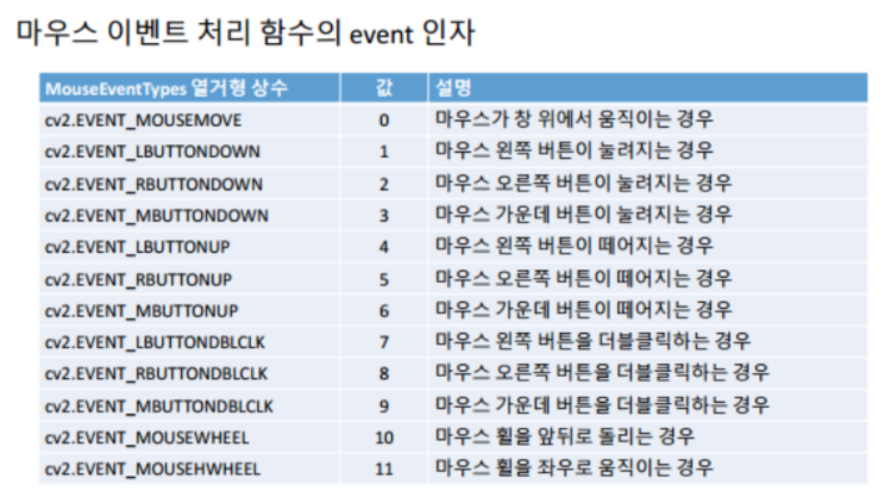
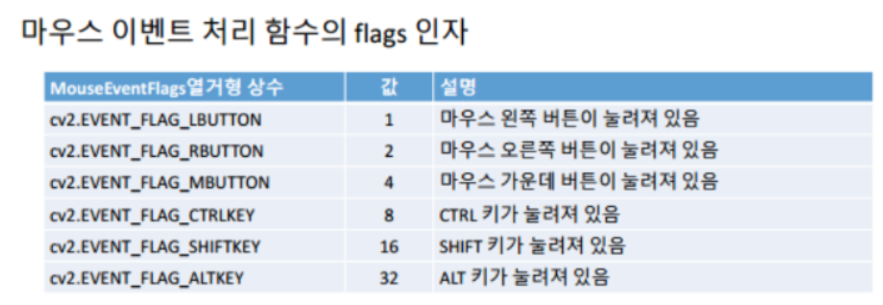

In [ ]:
'''
    마우스 이벤트를 지원하는 setMouseCallback 함수를 적용하기 위해서는
    사전에 사용자 정의함수가 선언되어 있어야 함
'''

# 사각형의 시작점과 끝점을 지정하기 위해서는 x,y 변수 외에 한 셋트가 더 필요함
# 좌표값은 항상 양수이므로 사용하지 않는 음수 값으로 초기화
x1, y1 = -1, -1

''' 
    event : 마우스 이벤트의 종류
    x, y, : 마우스 이벤트가 시행된 좌표
    flags : 마우스 이벤트 발생시의 상태
    img : 적용될 입력 이미지
'''
def rectangle(event, x, y, flags, img) :
    # global : 전역변수 설정
    global x1, y1
    # 마우스 좌클릭 시
    if event == cv2.EVENT_LBUTTONDOWN :
        x1, y1 = x, y
        print(f"사각형 좌상단 좌표 : {x1}, {y1}")
    # 마우스 좌클릭을 땠을 경우
    elif event == cv2.EVENT_LBUTTONUP :
        # x, y는 마우스 드래그가 끝나면서 좌측버튼이 떼질때의 사각형 우하단 좌표
        cv2.rectangle(img, (x1,y1), (x,y), (0,255,0), 3)
        print(f"사각형 우하단 좌표 : {x}, {y}")

In [ ]:
img = cv2.imread('image/cat.jpg')

# 생성될 윈도우 창의 이름 설정
cv2.namedWindow('figure')

# setMouseCallback(윈도우창 이름, 사용자 정의 함수명, 입력 이미지)
cv2.setMouseCallback('figure', rectangle, img)

while True :
    cv2.imshow('figure', img)
    # 마우스 이벤트 실행 후 사각형이 그려진 프레임이 보이기 까지의 시간
    key = cv2.waitKey(1)
    
    if key == 27 :
        cv2.destroyAllWindows()
        break

### 색상 추적

- RGB : 색의 3요소만 가지고 색상 판단
    - 채도, 명도에 따라 변화 심함 -> 어떤 색인지 명확히 알기 어려움
    - 채도 : 탁한 정도(수치 낮음 탁함), 명도 : 밝기 정도 (수치 클수록 밝음)
- HSV : 색상과 채도, 명도를 종합으로 판단하는 색 체계
    - H(hue 색상), S(Saturation 채도), V(Value 명도)
        - 색상은 각도 수치로 표현 (0~360), 빨강 -> 무지개, 360이 되면 다시 빨강으로
        - OpenCV에서 색 범위를 0~180으로 제한 사용해서 HSV 색상표에서 1/2 값으로 줄여 사용
        - 채도 : 0~100 수치가 낮을수록 탁함
        - 명도 : 0~100 수치가 클수록 밝아짐

##### RGB
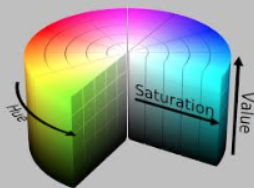

##### HSV
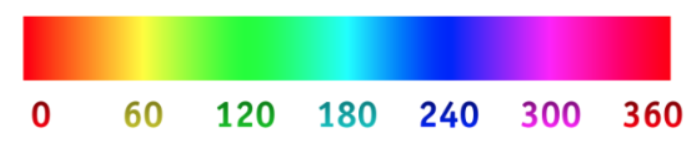

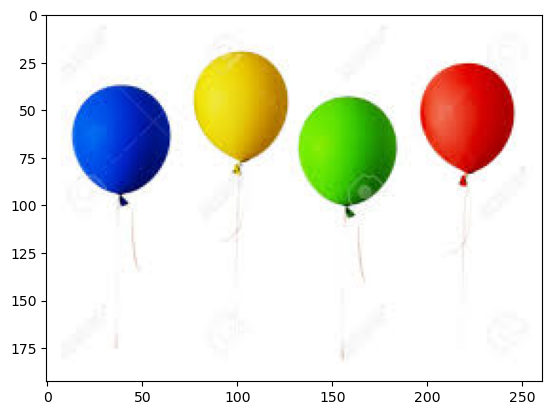

In [2]:
img = cv2.imread("image/balloon.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img);

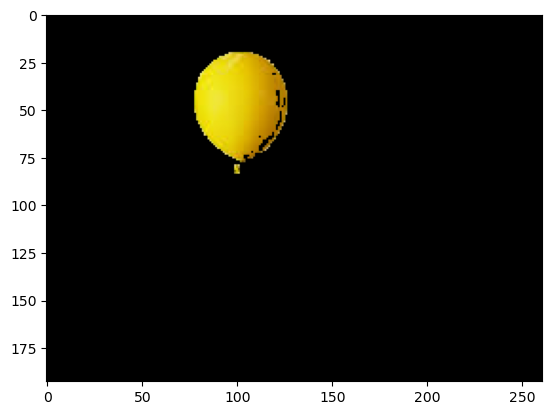

In [6]:
# 색상 체계를 RGB에서 HSV로
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

# 파란색 추적
# [색상, 채도, 명도]의 범위 설정
min_range = np.array([20,100,100])
max_range = np.array([40,255,255])

# 원하는 색상이 포함된 마스크 이미지 출력
# inRange : 설정한 범위에 해당하는 픽셀값은 그대로, 나머지는 0(검은색)으로 변환
img_mask = cv2.inRange(hsv, min_range, max_range)

# bitwise_and : 두 개의 이미지에서 공통적인 부분을 bit연산의 and로 진행
'''
    실제 이미지와 마스크 이미지를 and연산하여 해당 이미지에도 있고
    마스크 이미제도 있는 픽셀을 추출해내는 개념
'''
img2 = cv2.bitwise_and(img, img, mask=img_mask)

plt.imshow(img2);

# 빨간색 : 0~10
# 노란색 : 20~40
# 초록색 : 40~70
# 파란색 : 100~130